<a href="https://colab.research.google.com/github/roshitha-nair/Sentiment--analysis/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Data

In [3]:
import pandas as pd
#read csv file
df = pd.read_csv('/content/twitter_training.csv')
print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


 Clean the Text Data

In [5]:
import re
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\\S+", "", text)
    text = re.sub(r"[^A-Za-z ]", "", text)
    text = text.lower()
    return text
df['clean_text'] = df['im getting on borderlands and i will murder you all ,'].apply(clean_text)


Perform Sentiment Analysis

In [6]:
from textblob import TextBlob

# Calculate sentiment polarity
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment as Positive, Negative, or Neutral
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Check the sentiment distribution
print(df['sentiment'].value_counts())


sentiment
Positive    7371
Negative    4496
Neutral     3969
Name: count, dtype: int64


Visualize Sentiment

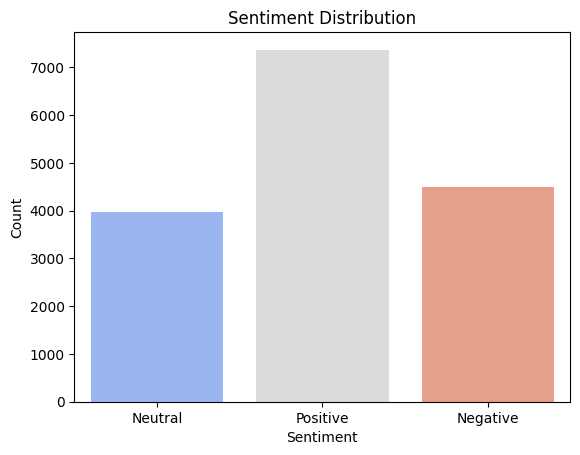

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment counts
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='coolwarm', legend=False) # Now df has 'sentiment' column
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


